In [11]:
#Importing the modules
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt
import pickle

In [23]:
#Loading the data sets
df = pd.read_csv('Datasets/covid_19_clean_data_Daywise(12-april).csv')
Days = np.array(df['Days'])
#print("Days",Days)
Confirmed = np.array(df['Confirmed'])
#print("Confirmed",Confirmed)
Deaths = np.array(df['Deaths'])
#print("Deaths",Deaths)
Recovered = np.array(df['Recovered'])
#print("Recovered",Recovered)

In [24]:
#Creating randon indices for spliting the data set
random_indices = np.random.permutation(81)
print(random_indices)

#Input train/test feature
Days_train = Days[random_indices[:]]
#Days_test = Days[random_indices[:]]

#Output train/test feature
Confirmed_train = Confirmed[random_indices[:]]
#Confirmed_test = Confirmed[random_indices[58:]]

Deaths_train = Deaths[random_indices[:]]
#Deaths_test = Deaths[random_indices[58:]]

Recovered_train = Recovered[random_indices[:]]
Recovered_test = Recovered[random_indices[58:]]

#Cheaking the lenth of taring sample
print(len(Confirmed_train))
print(len(Deaths_train))

[41 59 57 72  7 71 25 48 11 55 53 36 30 68 61  9 21 28 42 17  0 26  3 31
 51 47 64  8 34 56 60  2 35  1  4 73 19 23 50 37 22 15 32 13 49 70 80 75
 18 52 14 79 58 27 45 20 76  5 24 78 65 16 66 44 74  6 43 38 29 63 40 62
 39 54 33 10 12 69 77 67 46]
81
81


In [25]:
#Using Linear Regression 
#Function for training the model with decision tree
#Parameter of the functions are:
    #1. x_train = input feature training set
    #2. y_train = output feature training set
    
    
def model_train(x_train,y_train):
    #fitting the data into the model
    model = linear_model.LinearRegression()#Creating instance of linear model
    #sklearn takes input as matrix so the we have to reshape the matrix into colloum matrix
    x_train_for_fittng = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_fittng = np.matrix(y_train.reshape(len(y_train),1))
    
    #fit the data into the model
    return(model.fit(x_train_for_fittng,y_train_for_fittng))

In [67]:
'''#Calling the Linear regrassing function
model = model_train(Days_train,Confirmed_train)
model_prediction = model.predict(Days.reshape((len(Days),1)))

#Ploring the curve(Red : Traning Data, GREEN : Prediction  )
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days.reshape((len(Days),1)),model_prediction,color="green")'''

'#Calling the Linear regrassing function\nmodel = model_train(Days_train,Confirmed_train)\nmodel_prediction = model.predict(Days.reshape((len(Days),1)))\n\n#Ploring the curve(Red : Traning Data, GREEN : Prediction  )\nplt.scatter(Days_train,Confirmed_train,color="red")\nplt.plot(Days.reshape((len(Days),1)),model_prediction,color="green")'

In [26]:
#Function for Polynomial regrassing function
def poly_regr(X_train,Y_train,degree):
    polynom = PolynomialFeatures(degree=degree)
    X_poly = polynom.fit_transform(X_train.reshape(len(X_train),1))
    polyReg = LinearRegression()
    #Returing the fitted model
    return polyReg.fit(X_poly,Y_train.reshape(len(Y_train),1))   

In [27]:
#calling the plynomial regrassion model for confirm case
polynom = PolynomialFeatures(degree=4)
model = poly_regr(Days_train,Confirmed_train,4)
#Printing the model
print(model)

#Savhing the model into required dictory
'''import pickle
#creation a binary file first
with open('D:\Project\Corona_virus\Andriod_app\Andriod_app\covi19ModelConfirm','wb') as f:
    pickle.dump(model,f)'''

#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))
#print(predict)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


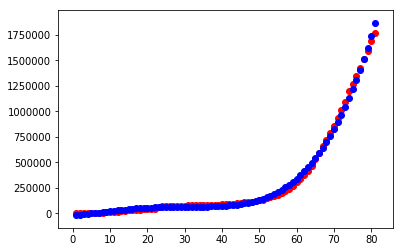

In [28]:
#Visulazing the predicted model
plt.scatter(Days_train,Confirmed_train,color="red")
plt.scatter(Days_train,predict,color="blue")
plt.show()

In [29]:
#Creating Array of custom Days
Days_array = []
#Creating Days Data for further Prediction
for i in range(1,112):
    Days_array.append(i) 
#Converting arary into np array    
Days_predict = np.array(Days_array)
#Predict the model on Future Date 
predict_Confirm = model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))

#creation a binary file first
with open('D:\Project\Corona_virus\Andriod_app\Andriod_app\covi19ModelConfirm','wb') as f:
    pickle.dump(model,f)
    

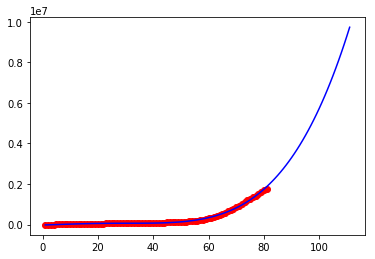

In [30]:
#Ploting the curve(Red: Traning Data, Blue: Future Prediction) for confirm case
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days_predict,predict_Confirm,color='blue')

In [31]:
#calling the plynomial regrassion model for Death Case
polynom = PolynomialFeatures(degree=4)
model = poly_regr(Days_train,Deaths_train,4)
#Printing the model
print(model)

#Savhing the model into required dictory
#creation a binary file first
with open('D:\Project\Corona_virus\Andriod_app\Andriod_app\covi19ModelDeath','wb') as f:
    pickle.dump(model,f)
    
    
#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [32]:
#Predict the model on Future Date 
predict_Death = model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))

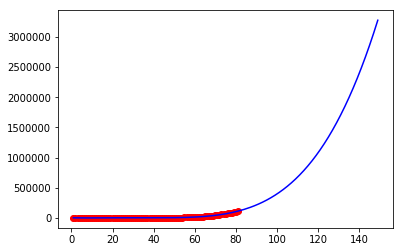

In [16]:
#Ploting the curve(Red: Traning Data, Blue: Future Prediction) for Death case
plt.scatter(Days_train,Deaths_train,color="red")
plt.plot(Days_predict,predict_Death,color='blue')

In [37]:
#calling the plynomial regrassion model for Recovery Case
polynom = PolynomialFeatures(degree=3)
model = poly_regr(Days_train,Recovered_train,3)
#Printing the model
print(model)

#Savhing the model into required dictory

#creation a binary file first
with open('D:\Project\Corona_virus\Andriod_app\Andriod_app\covi19ModelRecovery','wb') as f:
    pickle.dump(model,f)
    
#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [38]:
#Predict the model on Future Date
predict_Recovered = model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))
#print(predict_Confirm)

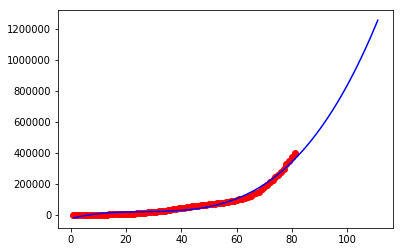

In [39]:
#Ploting the curve(Red: Traning Data, Blue: Future Prediction) for Death case
plt.scatter(Days_train,Recovered_train,color="red")
plt.plot(Days_predict,predict_Recovered,color='blue')

In [20]:
import pickle
#creation a binary file first
with open('covi19Model','wb') as f:
    pickle.dump(model,f)

In [34]:
with open('covi19Model','rb') as f:
    model = pickle.load(f)


In [62]:
print(predict_Recovered)

[[-1.61640548e+03]
 [-1.73800163e+03]
 [-1.79836912e+03]
 [-1.79750794e+03]
 [-1.73541809e+03]
 [-1.61209958e+03]
 [-1.42755240e+03]
 [-1.18177656e+03]
 [-8.74772047e+02]
 [-5.06538870e+02]
 [-7.70770273e+01]
 [ 4.13613481e+02]
 [ 9.65532656e+02]
 [ 1.57868050e+03]
 [ 2.25305700e+03]
 [ 2.98866218e+03]
 [ 3.78549602e+03]
 [ 4.64355852e+03]
 [ 5.56284969e+03]
 [ 6.54336953e+03]
 [ 7.58511803e+03]
 [ 8.68809520e+03]
 [ 9.85230104e+03]
 [ 1.10777355e+04]
 [ 1.23643987e+04]
 [ 1.37122905e+04]
 [ 1.51214110e+04]
 [ 1.65917602e+04]
 [ 1.81233380e+04]
 [ 1.97161445e+04]
 [ 2.13701797e+04]
 [ 2.30854435e+04]
 [ 2.48619360e+04]
 [ 2.66996572e+04]
 [ 2.85986070e+04]
 [ 3.05587855e+04]
 [ 3.25801927e+04]
 [ 3.46628285e+04]
 [ 3.68066930e+04]
 [ 3.90117862e+04]
 [ 4.12781080e+04]
 [ 4.36056585e+04]
 [ 4.59944376e+04]
 [ 4.84444455e+04]
 [ 5.09556820e+04]
 [ 5.35281471e+04]
 [ 5.61618409e+04]
 [ 5.88567634e+04]
 [ 6.16129146e+04]
 [ 6.44302944e+04]
 [ 6.73089029e+04]
 [ 7.02487400e+04]
 [ 7.3249805

In [75]:
print(type(predict_Confirm))

<class 'numpy.ndarray'>


In [2]:
def sum(a,n):
    return a+n

func = sum(3,7)
import pickle
#creation a binary file first
with open('D:\Project\Corona_virus\Andriod_app\Andriod_app\Recovery','wb') as f:
    pickle.dump(func,f)

In [5]:
with open('D:\Project\Corona_virus\Andriod_app\Andriod_app\Recovery','rb') as f:
    nerfuc = pickle.load(f)


EOFError: Ran out of input